# Q4: It's over Anakin, I have the high ground. I hate you!

0.9319306930693073


<Figure size 432x288 with 0 Axes>

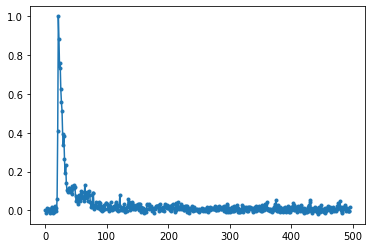

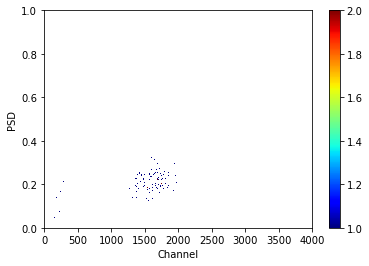

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import os
import fnmatch
from scipy.signal import find_peaks
import cProfile

def baseline(wave):
    '''calculates and restores the wf to zero baseline'''
    baseline_val = np.mean(wave[:15])
    return wave - baseline_val
            
def Q_long(wave):
    '''function that calculates the Qlong'''
    impulso = baseline(wave)
    Q_longp = sum(impulso[7:107])
    #print(len(impulso))
    return Q_longp

def Q_short(wave):
    '''function that calculates the Qshort'''
    impulso = baseline(wave)
    Q_shortp = sum(impulso[7:39])
    return Q_shortp
             
def waveform(file, somma):
    Q_l = np.zeros(somma)
    Q_s = np.zeros(somma)
    PSD = np.zeros(somma)
    ql = []
    psd=[]
    wt = []
    wt_n = []
    w_p=[]
    header = file.read(2)
    index_perc  = np.linspace(0, somma, 100)
    plt.figure()
    for i in range(somma):
        '''to keep track of the compiling percentage'''
        #for k in range(len(index_perc)):
        #    if i == int(index_perc[k]):
        #        print(i/(somma)*100)
        
        '''to read the binary file'''    
        
        board = file.read(2)
        channel = file.read(2)
        time_stamp = file.read(8)
        Elong = file.read(2)
        Eshort = file.read(2)
        stuff1 = file.read(5)
        number_of_samples= file.read(4)
          
        dElong = int.from_bytes(Elong, byteorder="little")
        dEshort = int.from_bytes(Eshort, byteorder="little")
        dtime_stamp = int.from_bytes(time_stamp, byteorder = 'little')
        dnumber_of_samples = int.from_bytes(number_of_samples, byteorder = 'little') 
        
        a = np.zeros(dnumber_of_samples) #considering the entire pulse
        #a = np.zeros(500) #considering only a part of the pulse
        for j in range(dnumber_of_samples):
            sample = file.read(2)
            dsample = int.from_bytes(sample, byteorder="little")
            #if j<500: #considering only a part of the pulse
            a[j] = dsample
        
        '''pile-up rejection'''
        w=np.array(baseline(-a))
        
        w_filtered =savgol_filter(w, 13, 3) #smoothing filter
        tr=0.20*max(w_filtered)
        
        peaks, _ = find_peaks(w_filtered, height=tr)
        
        if len(peaks)>1:
            w_p.append(a)
            PSD[i] = 0
            Q_l[i] = 0
        else:
            Q_l[i] = Q_long(-a)
            Q_s[i] = Q_short(-a)
            # Q_l[i]=dElong
            # Q_s[i]=dEshort
            
            if Q_l[i] == 0:
                Q_l[i] = 1
                
            PSD[i]=(Q_l[i]-Q_s[i])/Q_l[i]
              
        '''consider only waveforms in a certain interval'''   
        if Q_l[i] > 1400 and Q_l[i] < 1700 and PSD[i] > 0.3 and PSD[i] < 0.4:
               wt.append(baseline(-a))  
      
    for j in range(len(PSD)):
        if PSD[j] != 0:
            psd.append(PSD[j])
            ql.append(Q_l[j])
            
    #plt.figure()
    #plt.hist(ql, 500)
               
    # #print(len(psd))
    
    wt = np.array(wt)
    #print(len(wt))
    #plt.figure()
    for l in range(len(wt)): #waveforms normalization
         wt_n.append(wt[l]/np.max(wt[l]))
         #plt.plot(wt_n[l])
    
    w_m = np.mean(wt_n, axis=0)
    plt.figure()
    #plt.plot(w_m, label='w_m') #mean of the normalized wf
    wm_n = w_m/max(w_m)
    plt.plot(wm_n, '.-', label='w_m_n') #normalization of the mean
    #plt.legend()
    print(max(w_m))
    
    '''psd histogram'''    
    plt.figure()
    my_cmap = plt.cm.get_cmap("jet").copy()
    my_cmap.set_under('w',1)
    plt.hist2d(ql, psd, bins=500, range=[[0, 4000],[0, 1]], cmin=1, cmap=my_cmap)
    plt.colorbar()
    plt.xlabel('Channel')
    plt.ylabel('PSD')
    
    return ql, psd
      
dir_cs_1 = './Scint'    
file_001 = fnmatch.filter(os.listdir(dir_cs_1),'DataR_CH5@DT5730_701_run1_8.BIN')[0]
file1 = open(dir_cs_1 + '/' + file_001,"rb")

vsample1 = waveform(file1, 1000)
#waveform(file1, 1000)

0.9319306930693073
         1456692 function calls (1444734 primitive calls) in 3.327 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    3.327    3.327 {built-in method builtins.exec}
        1    0.000    0.000    3.327    3.327 <string>:1(<module>)
        1    0.758    0.758    3.326    3.326 1557551222.py:30(waveform)
     1000    0.015    0.000    1.494    0.001 _savitzky_golay.py:225(savgol_filter)
17433/7369    0.071    0.000    1.031    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     1000    0.009    0.000    1.020    0.001 _savitzky_golay.py:210(_fit_edges_polyfit)
     2000    0.066    0.000    1.011    0.001 _savitzky_golay.py:166(_fit_edge)
     2000    0.007    0.000    0.679    0.000 <__array_function__ internals>:2(polyfit)
     2000    0.131    0.000    0.663    0.000 polynomial.py:453(polyfit)
     2000    0.006    0.000    0.369    0.000 <__a

       13    0.000    0.000    0.003    0.000 _base.py:2303(_process_unit_info)
        6    0.000    0.000    0.003    0.000 patches.py:733(__init__)
        3    0.000    0.000    0.003    0.001 collections.py:76(__init__)
      371    0.001    0.000    0.003    0.000 re.py:188(match)
      996    0.002    0.000    0.002    0.000 __init__.py:100(check_in_list)
     1000    0.002    0.000    0.002    0.000 filters.py:50(_invalid_origin)
     2090    0.002    0.000    0.002    0.000 {built-in method builtins.hasattr}
       39    0.000    0.000    0.002    0.000 path.py:98(__init__)
       76    0.000    0.000    0.002    0.000 fromnumeric.py:52(_wrapfunc)
      495    0.002    0.000    0.002    0.000 contextlib.py:86(__init__)
     4000    0.002    0.000    0.002    0.000 {method '__array_prepare__' of 'numpy.ndarray' objects}
      162    0.001    0.000    0.002    0.000 artist.py:713(set_figure)
      371    0.002    0.000    0.002    0.000 __init__.py:1791(<dictcomp>)
       55    

       16    0.000    0.000    0.001    0.000 {method 'min' of 'numpy.ndarray' objects}
        3    0.000    0.000    0.001    0.000 _base.py:1330(_set_title_offset_trans)
      333    0.001    0.000    0.001    0.000 {built-in method _abc._abc_instancecheck}
      135    0.000    0.000    0.001    0.000 artist.py:193(convert_xunits)
       61    0.000    0.000    0.001    0.000 text.py:253(set_rotation_mode)
      114    0.000    0.000    0.001    0.000 font_manager.py:781(set_family)
        3    0.000    0.000    0.001    0.000 _base.py:795(_set_lim_and_transforms)
       28    0.000    0.000    0.001    0.000 axis.py:1494(convert_units)
      226    0.000    0.000    0.001    0.000 function_base.py:244(iterable)
        2    0.000    0.000    0.001    0.000 collections.py:841(set_alpha)
        9    0.000    0.000    0.001    0.000 markers.py:703(_set_tickdown)
       55    0.000    0.000    0.001    0.000 lines.py:1058(set_drawstyle)
     1145    0.001    0.000    0.001    0.000 

      204    0.000    0.000    0.000    0.000 ticker.py:227(set_axis)
       24    0.000    0.000    0.000    0.000 {method 'addConstraint' of 'kiwisolver.Solver' objects}
        1    0.000    0.000    0.000    0.000 _base.py:3293(set_xlabel)
       28    0.000    0.000    0.000    0.000 transforms.py:1817(is_separable)
       20    0.000    0.000    0.000    0.000 stride_tricks.py:536(<listcomp>)
        4    0.000    0.000    0.000    0.000 core.py:1550(make_mask)
       54    0.000    0.000    0.000    0.000 scale.py:89(__init__)
        4    0.000    0.000    0.000    0.000 transforms.py:815(null)
        1    0.000    0.000    0.000    0.000 shape_base.py:82(atleast_2d)
        1    0.000    0.000    0.000    0.000 function_base.py:4288(<listcomp>)
        3    0.000    0.000    0.000    0.000 _pylab_helpers.py:110(_set_new_active_manager)
      265    0.000    0.000    0.000    0.000 axis.py:360(<genexpr>)
       20    0.000    0.000    0.000    0.000 patches.py:492(set_joinstyl

        3    0.000    0.000    0.000    0.000 __init__.py:1116(is_interactive)
       10    0.000    0.000    0.000    0.000 transforms.py:1739(<lambda>)
       10    0.000    0.000    0.000    0.000 axis.py:738(get_scale)
        6    0.000    0.000    0.000    0.000 gridspec.py:101(set_width_ratios)
       24    0.000    0.000    0.000    0.000 {built-in method numpy.geterrobj}
        7    0.000    0.000    0.000    0.000 gridspec.py:190(<listcomp>)
        1    0.000    0.000    0.000    0.000 colors.py:832(copy)
        3    0.000    0.000    0.000    0.000 _pylab_helpers.py:34(get_fig_manager)
        2    0.000    0.000    0.000    0.000 artist.py:622(set_snap)
       16    0.000    0.000    0.000    0.000 axis.py:1425(<dictcomp>)
        3    0.000    0.000    0.000    0.000 _collections_abc.py:779(items)
       12    0.000    0.000    0.000    0.000 axis.py:558(__init__)
        1    0.000    0.000    0.000    0.000 re.py:250(compile)
        3    0.000    0.000    0.000    0.

<Figure size 432x288 with 0 Axes>

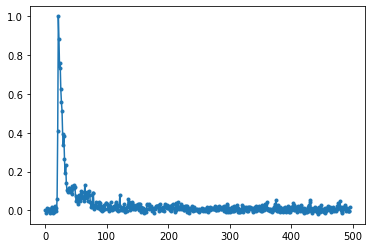

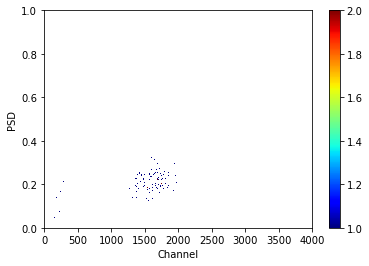

In [45]:
dir_cs_1 = './Scint'    
file_001 = fnmatch.filter(os.listdir(dir_cs_1),'DataR_CH5@DT5730_701_run1_8.BIN')[0]
file1 = open(dir_cs_1 + '/' + file_001,"rb")

cProfile.run('waveform(file1, 1000)', sort='cumtime')

0.9319306930693073


<Figure size 432x288 with 0 Axes>

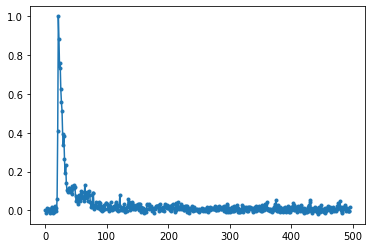

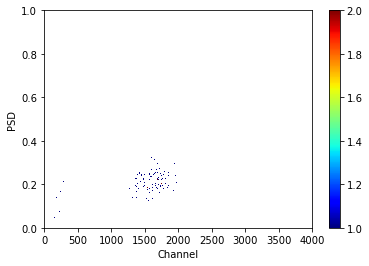

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import os
import fnmatch
from scipy.signal import find_peaks
import cProfile

def baseline(wave):
    '''calculates and restores the wf to zero baseline'''
    baseline_val = np.mean(wave[:15])
    return wave - baseline_val
            
def Q_long(wave):
    '''function that calculates the Qlong'''
    impulso = baseline(wave)
    Q_longp = sum(impulso[7:107])
    #print(len(impulso))
    return Q_longp

def Q_short(wave):
    '''function that calculates the Qshort'''
    impulso = baseline(wave)
    Q_shortp = sum(impulso[7:39])
    return Q_shortp
             
def waveform_new(file, somma):
    Q_l = np.zeros(somma)
    Q_s = np.zeros(somma)
    PSD = np.zeros(somma)
    ql = []
    psd=[]
    wt = []
    wt_n = []
    w_p=[]
    header = file.read(2)
    index_perc  = np.linspace(0, somma, 100)
    plt.figure()
    for i in range(somma):
        '''to keep track of the compiling percentage'''
        #for k in range(len(index_perc)):
        #    if i == int(index_perc[k]):
        #        print(i/(somma)*100)
        
        '''to read the binary file'''    
        
        file.read(2)
        file.read(2)
        file.read(8)
        Elong = file.read(2)
        Eshort = file.read(2)
        file.read(5)
        dnumber_of_samples = int.from_bytes(file.read(4), byteorder="little")
        a = np.frombuffer(file.read(2 * dnumber_of_samples), dtype=np.int16)
        dElong = int.from_bytes(Elong, byteorder="little")
        dEshort = int.from_bytes(Eshort, byteorder="little")
        
        #plt.figure()
        #plt.plot(a,'.')
        #plt.plot(-a, '.-')
        
        '''pile-up rejection'''
        w=np.array(baseline(-a))
        
        w_filtered =savgol_filter(w, 13, 3) #smoothing filter
        tr=0.20*max(w_filtered)
        
        peaks, _ = find_peaks(w_filtered, height=tr)
        
        if len(peaks)>1:
            w_p.append(a)
            PSD[i] = 0
            Q_l[i] = 0
        else:
            Q_l[i] = Q_long(-a)
            Q_s[i] = Q_short(-a)
            # Q_l[i]=dElong
            # Q_s[i]=dEshort
            
            if Q_l[i] == 0:
                Q_l[i] = 1
            
            PSD[i]=(Q_l[i]-Q_s[i])/Q_l[i]
              
        '''consider only waveforms in a certain interval'''   
        if Q_l[i] > 1400 and Q_l[i] < 1700 and PSD[i] > 0.3 and PSD[i] < 0.4:
               wt.append(baseline(-a))  
     
    #print(len(w_p))  
    for j in range(len(PSD)):
        if PSD[j] != 0:
            psd.append(PSD[j])
            ql.append(Q_l[j])
            
    #plt.figure()
    #plt.hist(ql, 500)
               
    # #print(len(psd))
    
    wt = np.array(wt)
    #print(len(wt))
    #plt.figure()
    for l in range(len(wt)): #waveforms normalization
         wt_n.append(wt[l]/np.max(wt[l]))
         #plt.plot(wt_n[l])
    
    w_m = np.mean(wt_n, axis=0)
    plt.figure()
    #plt.plot(w_m, label='w_m') #mean of the normalized wf
    wm_n = w_m/max(w_m)
    plt.plot(wm_n, '.-', label='w_m_n') #normalization of the mean
    #plt.legend()
    print(max(w_m))
    
    '''psd histogram'''    
    plt.figure()
    my_cmap = plt.cm.get_cmap("jet").copy()
    my_cmap.set_under('w',1)
    plt.hist2d(ql, psd, bins=500, range=[[0, 4000],[0, 1]], cmin=1, cmap=my_cmap)
    plt.colorbar()
    plt.xlabel('Channel')
    plt.ylabel('PSD')
    
    return ql, psd
      
dir_cs_1 = './Scint'    
file_001 = fnmatch.filter(os.listdir(dir_cs_1),'DataR_CH5@DT5730_701_run1_8.BIN')[0]
file1 = open(dir_cs_1 + '/' + file_001,"rb")

vsample1 = waveform(file1, 1000)
#waveform(file1, 1000)